In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
df= pd.DataFrame()


In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

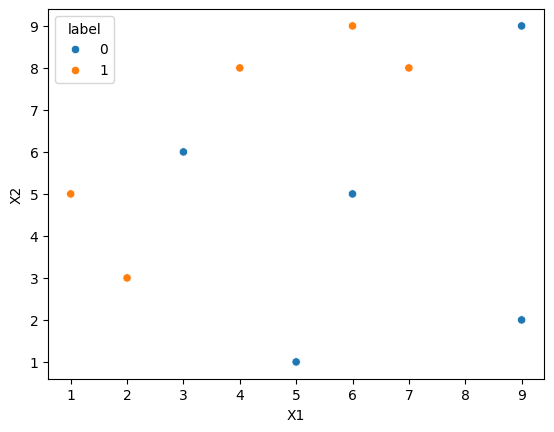

In [5]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
df['weights']= 1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X= df.iloc[:,0:2].values
y= df.iloc[:,2].values

train first model

In [11]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

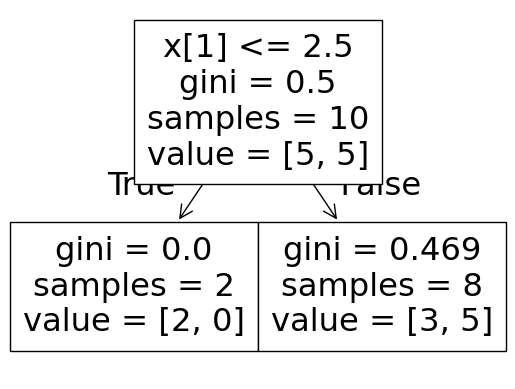

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

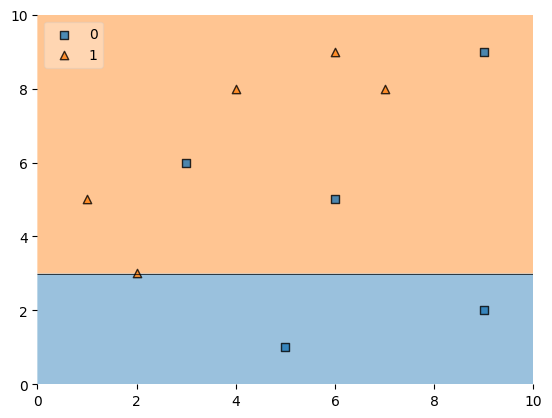

In [13]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):

    return 0.5*np.log((1-error)/(error))

calculate model weight


In [17]:
alpha1 = calculate_model_weight(0.3)

In [18]:
alpha1

0.42364893019360184

update weights

In [19]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [20]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [21]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [22]:
df['updated_weights'].sum()

0.9165153319682015

In [23]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [24]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [25]:
df['normalized_weights'].sum()

1.0

In [26]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [27]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [28]:
df[['X1','X1','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X1,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,1,1,0.1,1,0.065508,0.000000,0.071475
1,2,2,1,0.1,1,0.065508,0.071475,0.142950
2,3,3,0,0.1,1,0.152653,0.142950,0.309508
3,4,4,1,0.1,1,0.065508,0.309508,0.380983
4,5,5,0,0.1,0,0.065508,0.380983,0.452458
5,6,6,1,0.1,1,0.065508,0.452458,0.523933
6,6,6,0,0.1,1,0.152653,0.523933,0.690492
7,7,7,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,9,0,0.1,0,0.065508,0.928525,1.000000


In [29]:
def create_new_dataset(df):

  indices= []
  for i in range(df.shape[0]):
    a= np.random.random()
    for index,row in df.iterrows():
     if row['cumsum_upper'] > a and a > row["cumsum_lower"]:
      indices.append(index)
  return indices

In [30]:
index_values = create_new_dataset(df)

index_values

[8, 8, 5, 9, 8, 2, 3, 3, 2, 6]

In [31]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [32]:
second_df

,X1,X2,label,weights
8,9,9,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
9,9,2,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1


In [33]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [34]:
X= second_df.iloc[:,0:2].values
y= second_df.iloc[:,2].values

In [35]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.625, 0.5, '  False')]

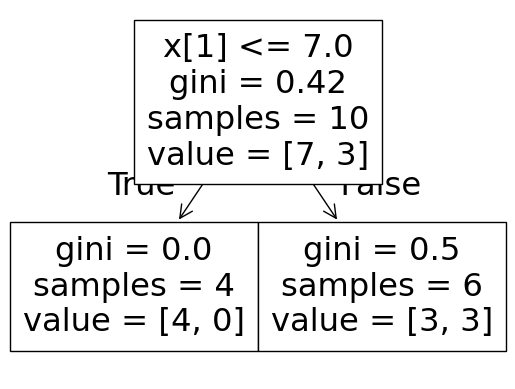

In [36]:
plot_tree(dt2)

<Axes: >

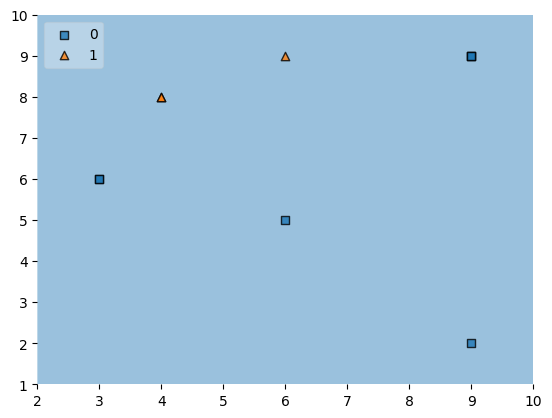

In [37]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [38]:
second_df['y_pred']=dt2.predict(X)

In [39]:
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
8,9,9,0,0.1,0
5,6,9,1,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
3,4,8,1,0.1,0
3,4,8,1,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0


In [40]:
alpha2 = calculate_model_weight(0.1)

In [41]:
alpha2

1.0986122886681098

if yorr working on a small data soemtimes it seems that the error in the model is almost not so there the initial formula

0.5*np.log((1-error)/(error))

you can add a

0.5*np.log((1-error)/(error+0.000001))

In [42]:
def update_row_weights(row,alpha=5.40):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [43]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [44]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [45]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
8,9,9,0,0.1,0,0.000452,0.000007
8,9,9,0,0.1,0,0.000452,0.000007
5,6,9,1,0.1,0,22.140642,0.333317
9,9,2,0,0.1,0,0.000452,0.000007
8,9,9,0,0.1,0,0.000452,0.000007
2,3,6,0,0.1,0,0.000452,0.000007
3,4,8,1,0.1,0,22.140642,0.333317
3,4,8,1,0.1,0,22.140642,0.333317
2,3,6,0,0.1,0,0.000452,0.000007
6,6,5,0,0.1,0,0.000452,0.000007


In [46]:
second_df['normalized_weights'].sum()

1.0

In [47]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [48]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [49]:
second_df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.000452,0.000000,0.000007
8,9,9,0,0.1,0,0.000452,0.000007,0.000014
5,6,9,1,0.1,0,22.140642,0.000014,0.333331
9,9,2,0,0.1,0,0.000452,0.333331,0.333338
8,9,9,0,0.1,0,0.000452,0.333338,0.333345
2,3,6,0,0.1,0,0.000452,0.333345,0.333351
3,4,8,1,0.1,0,22.140642,0.333351,0.666669
3,4,8,1,0.1,0,22.140642,0.666669,0.999986
2,3,6,0,0.1,0,0.000452,0.999986,0.999993
6,6,5,0,0.1,0,0.000452,0.999993,1.000000


In [50]:
index_values = create_new_dataset(second_df)

In [51]:
third_df= second_df.iloc[index_values,[0,1,2,3]]

In [52]:
third_df

,X1,X2,label,weights
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
9,9,2,0,0.1


In [53]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [54]:
X= second_df.iloc[:,0:2].values
y= second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

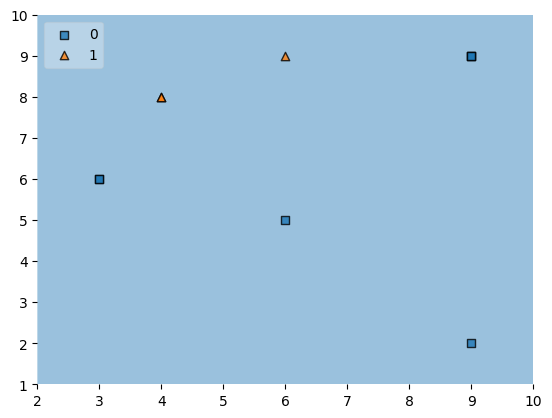

In [55]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [56]:
third_df['y_pred'] = dt3.predict(X)

In [57]:
third_df

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0


In [58]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [59]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


PREDICTION

In [60]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [61]:
dt2.predict(query)

array([0])

In [62]:
dt3.predict(query)

array([0])

In [63]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [64]:
np.sign(1.09)

1.0

In [65]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [66]:
dt2.predict(query)

array([0])

In [67]:
dt3.predict(query)

array([0])

In [68]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [69]:
np.sign(-0.25)

-1.0